In [1]:
import sys
print(f'This notebook was last run with this kernel {sys.executable}')

This notebook was last run with this kernel /home/igarzonalva/.conda/envs/scvi_cpu_env/bin/python


In [2]:
import scanpy as sc
import os
import numpy as np
import pandas as pd

os.chdir('/home/igarzonalva/Proyecto_SC_TNBC/GSE161529/02_Integration')

In [36]:
print(f'scanpy version:{sc.__version__}')

scanpy version:1.10.4


In [3]:
adata = sc.read_h5ad("./adata/adata_scvi_cuda.h5ad")
adata

AnnData object with n_obs × n_vars = 205006 × 22788
    obs: 'batch', 'subtype', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'complexity', 'n_genes', 'n_counts', 'predicted_labels', 'over_clustering', 'majority_voting', 'doublet_score', 'predicted_doublet', 'leiden'
    var: 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'hvg', 'leiden', 'log1p', 'neighbors', 'umap'
    obsm: 'X_scVI', 'X_umap'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

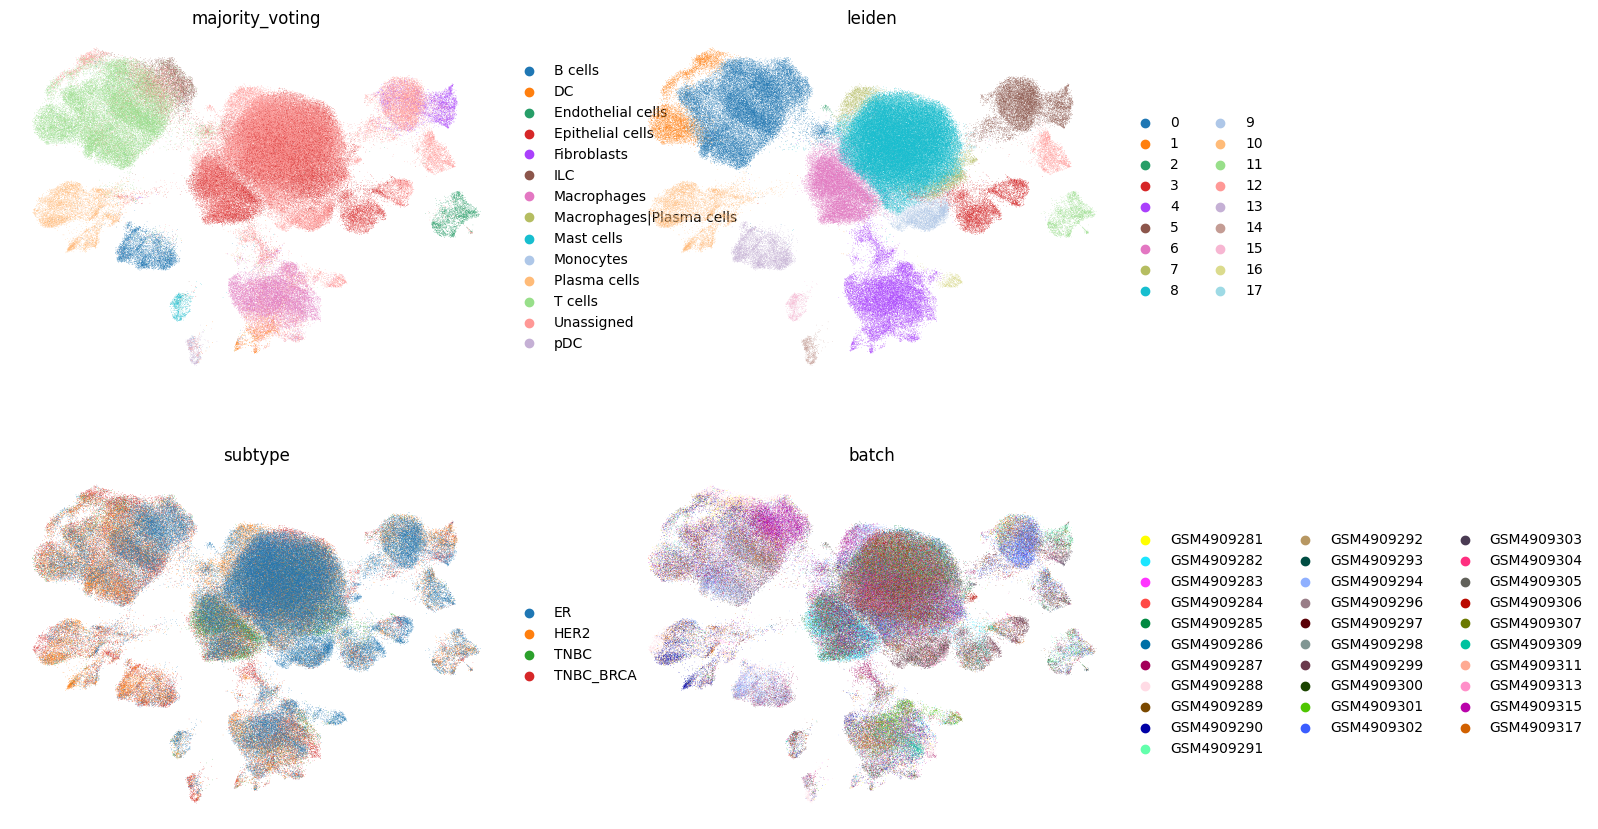

In [13]:
sc.pl.umap(
    adata, color=["majority_voting","leiden","subtype","batch"],
    #legend_loc="on data",
    frameon=False,ncols=2,use_raw = False)
    #cmap = "viridis" size = 7)

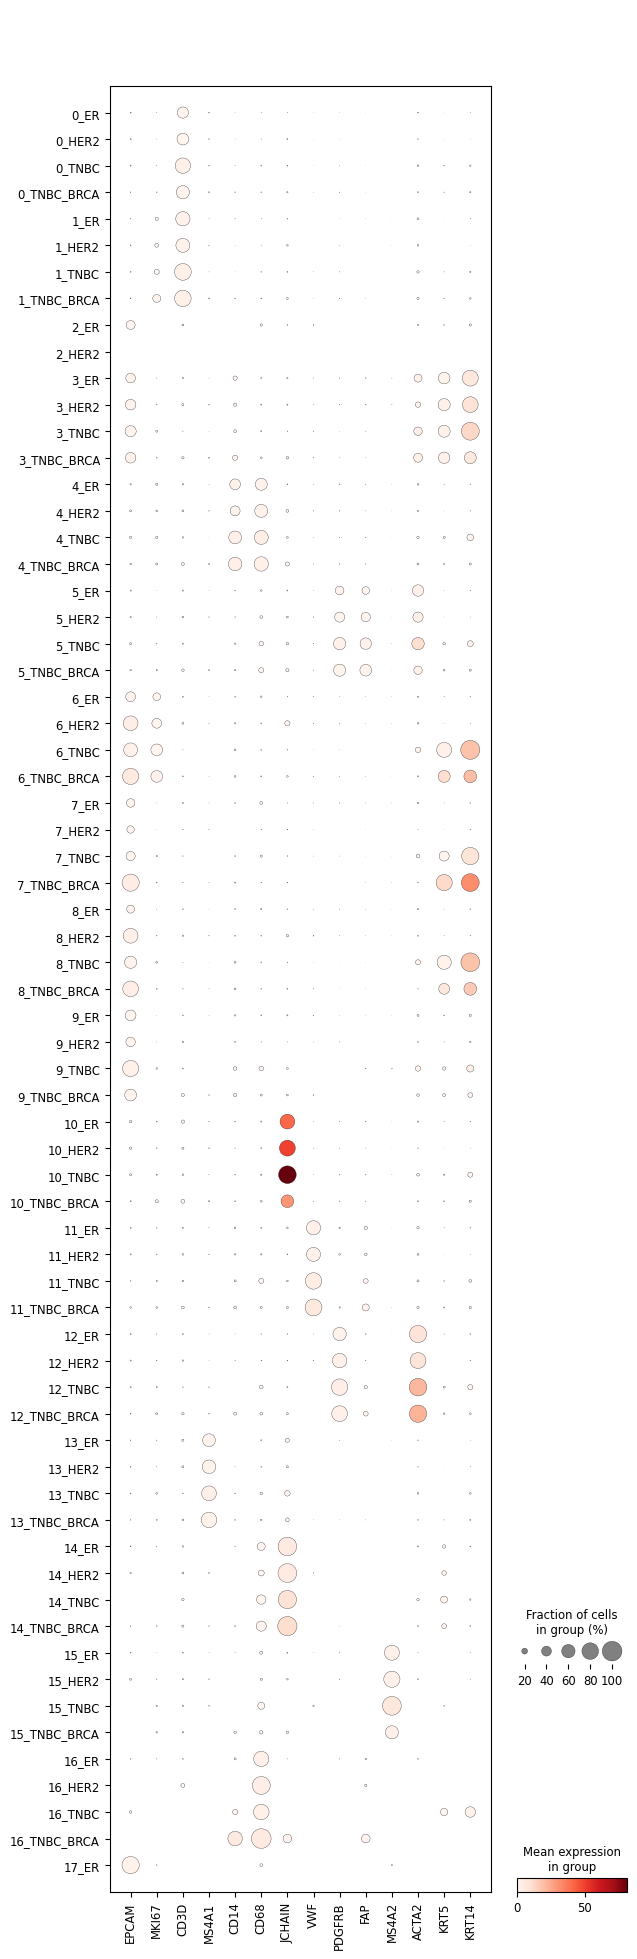

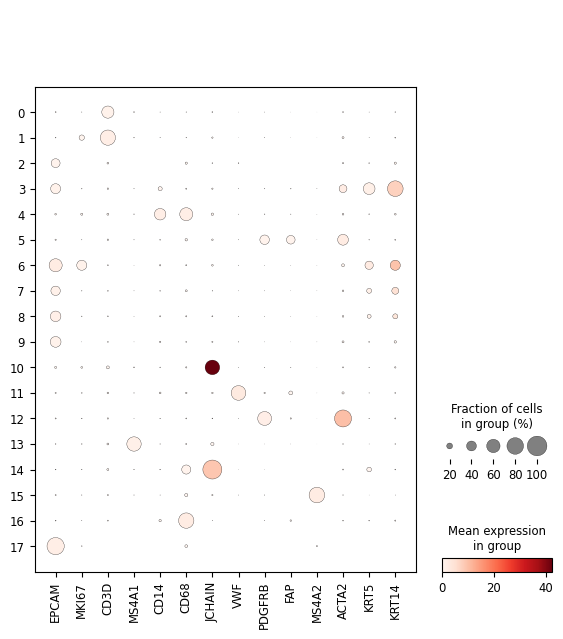

In [22]:
# "EPCAM","CDH1" epithelial
# "MKI67" proliferative
# "CD3D", T cells
# "MS4A1" B cells
# JCHAIN plasma cells
# CD14 Monocytes
# "CD68" macrophages
# "PECAM1","VWF" endothelial
# "PDGFRB","FAP" fibroblasts
# MS4A2 Mast/Basophiphs cells

general_markers  = ["EPCAM","MKI67", "CD3D", "MS4A1", "CD14", "CD68","JCHAIN", "VWF", "PDGFRB","FAP","MS4A2","ACTA2", "KRT5", "KRT14"]


sc.pl.dotplot(adata=adata, var_names=general_markers, groupby=["leiden",'subtype'])
sc.pl.dotplot(adata=adata, var_names=general_markers, groupby=["leiden"])

In [28]:
rename_dict = {"0": "T cells",
                "1": "T cells",
               "2": "unknown",
               "3": "Epithelial", #Myoepithelial
               "4": "Myeloid",
               "5": "Fibroblast FAP+",
               "6": "Cycling Epithelial",
               "7": "Epithelial",
               "8": "Epithelial",
               "9": "Epithelial",
               "10": "Plasma cells",
               "11": "Endothelial",
               "12": "Fibroblast FAP-",
               "13": "B cells",
               "14": "unknown",
               "15": "Mast cells", 
               "16": "Myeloid",
               "17": "unknown",
               }
#adata.obs['GenAnno'] = adata.obs['leiden'].replace(rename_dict)
adata.obs['IGA_First_GenAnno'] = adata.obs['leiden'].map(rename_dict).astype('category')
adata.obs['IGA_First_GenAnno'].info()
adata.obs['IGA_First_GenAnno'].value_counts()

<class 'pandas.core.series.Series'>
Index: 205006 entries, AAACCTGCAAGCGTAG-1-GSM4909281 to TTTGTTGTCTCGGTAA-1-GSM4909317
Series name: IGA_First_GenAnno
Non-Null Count   Dtype   
--------------   -----   
205006 non-null  category
dtypes: category(1)
memory usage: 9.8+ MB


IGA_First_GenAnno
Epithelial            94466
T cells               41213
Cycling Epithelial    19966
Myeloid               19488
Fibroblast FAP+       10956
Plasma cells           7372
B cells                5162
Endothelial            2401
Fibroblast FAP-        2262
unknown                 874
Mast cells              846
Name: count, dtype: int64

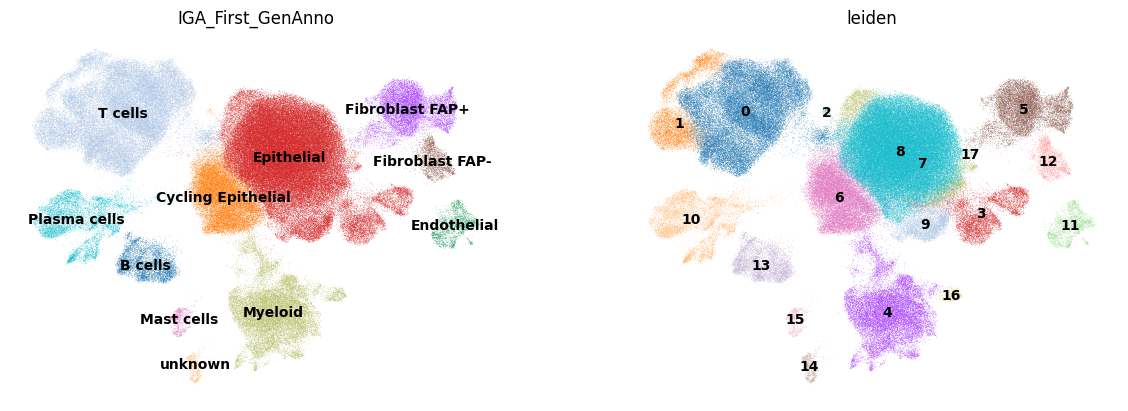

In [29]:
sc.pl.umap(
    adata, color=["IGA_First_GenAnno","leiden"],
    legend_loc="on data",
    frameon=False,ncols=2,use_raw = False)
    #cmap = "viridis" size = 7)

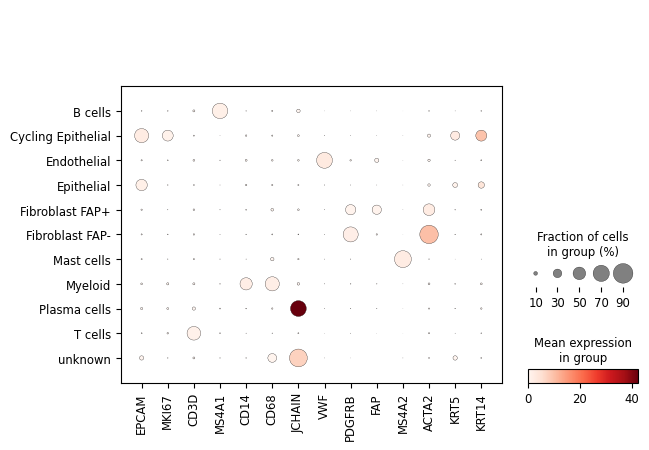

In [30]:
sc.pl.dotplot(adata=adata, var_names=general_markers, groupby=["IGA_First_GenAnno"])

In [34]:
adata.write_h5ad("./adata/adata_GenAnno.h5ad")